In [212]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
warnings.filterwarnings('ignore')
playstore = pd.read_csv("Google-Playstore.csv", date_parser=["Last Updated", "Released"])
playstore.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [213]:
playstore.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,1.111286e+06,1.111286e+06,1.117975e+06,1.118136e+06,1.118136e+06
mean,2.490334e+00,5.159633e+03,3.136432e+05,5.444534e+05,2.050728e-01
std,2.053973e+00,2.724094e+05,2.043941e+07,3.031058e+07,3.541011e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.600000e+02,0.000000e+00
50%,3.600000e+00,1.100000e+01,1.000000e+03,1.719000e+03,0.000000e+00
75%,4.300000e+00,1.000000e+02,1.000000e+04,1.911600e+04,0.000000e+00
max,5.000000e+00,1.253808e+08,1.000000e+10,1.077270e+10,4.000000e+02


In [214]:
playstore.describe(include="O")

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy
count,1118135,1118136,1118133,1117975,1117975,1118136,1116123,1118134,703770,1118114,1110406,1118136,1118136,964612
unique,1046869,1118136,48,22,54,1482,139,165593,256899,261786,3963,3706,6,380030
top,Tic Tac Toe,com.httrack.android,Education,"1,000+",USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Oct 13, 2020","Nov 24, 2020",Everyone,http://www.cmcm.com/protocol/launcher-theme/pr...
freq,143,1,115242,198309,1075136,37254,344239,538,706,1529,1194,6638,968246,1805


In [215]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

In [216]:
# Train test through sklearn
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(playstore,test_size=0.15,random_state=42)

In [217]:
# Some have null values and we need to fix that before moving on
for col in train_data.columns:
    null=train_data[col].isnull().sum()
    print('{0} have {1}   null value'.format(col,null))

App Name have 1   null value
App Id have 0   null value
Category have 2   null value
Rating have 5860   null value
Rating Count have 5860   null value
Installs have 135   null value
Minimum Installs have 135   null value
Maximum Installs have 0   null value
Free have 0   null value
Price have 0   null value
Currency have 135   null value
Size have 0   null value
Minimum Android have 1696   null value
Developer Id have 2   null value
Developer Website have 352486   null value
Developer Email have 19   null value
Released have 6600   null value
Last Updated have 0   null value
Content Rating have 0   null value
Privacy Policy have 130499   null value
Ad Supported have 0   null value
In App Purchases have 0   null value
Editors Choice have 0   null value


In [218]:
train_data.fillna(method='bfill',inplace=True)

In [219]:
# Columns by category
categorical_columns=[]
for col in train_data.columns:
    if train_data[col].dtype=='O':
        categorical_columns.append(col)
categorical_columns

['App Name',
 'App Id',
 'Category',
 'Installs',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last Updated',
 'Content Rating',
 'Privacy Policy']

In [220]:
# Installs
def string_to_numeric(data):
    data=data.replace(',','')
    data=data[:-1]
    return int(data)

train_data['Installs']=train_data['Installs'].apply(string_to_numeric)  



[]

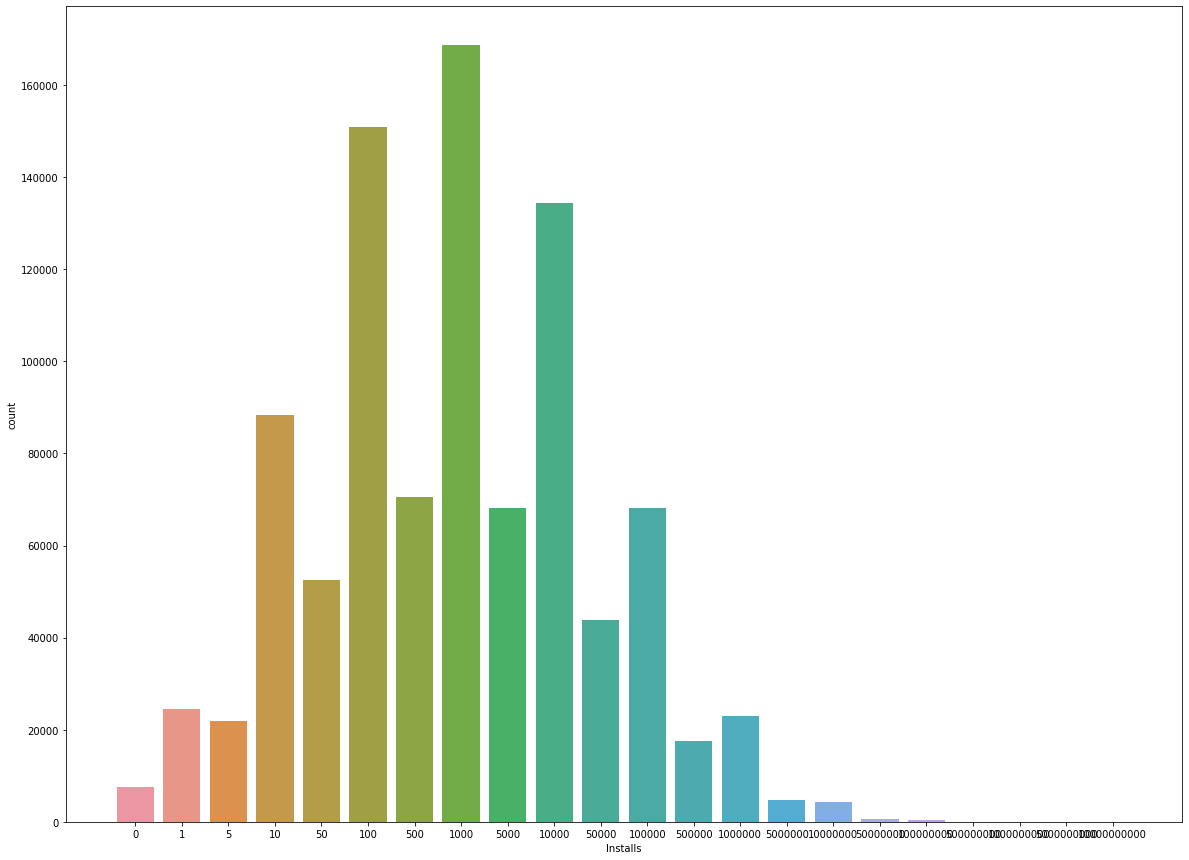

In [221]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Installs'])
plt.plot()

In [222]:
# App size
def define_size(data):
    data=data.replace(',','')
    num=data[:-1]
    if data[-1]=='K' or data[-1]=='k' :
        return float(num)
    elif data[-1]=='M' or data[-1]=='m':
        return float(num)*1000
    elif data[-1]=='G' or data[-1]=='g':
        return float(num)*1000000
    else:
        return 1000

In [223]:
# Make app data conversion into KB
train_data['Size']=train_data['Size'].apply(define_size)

[]

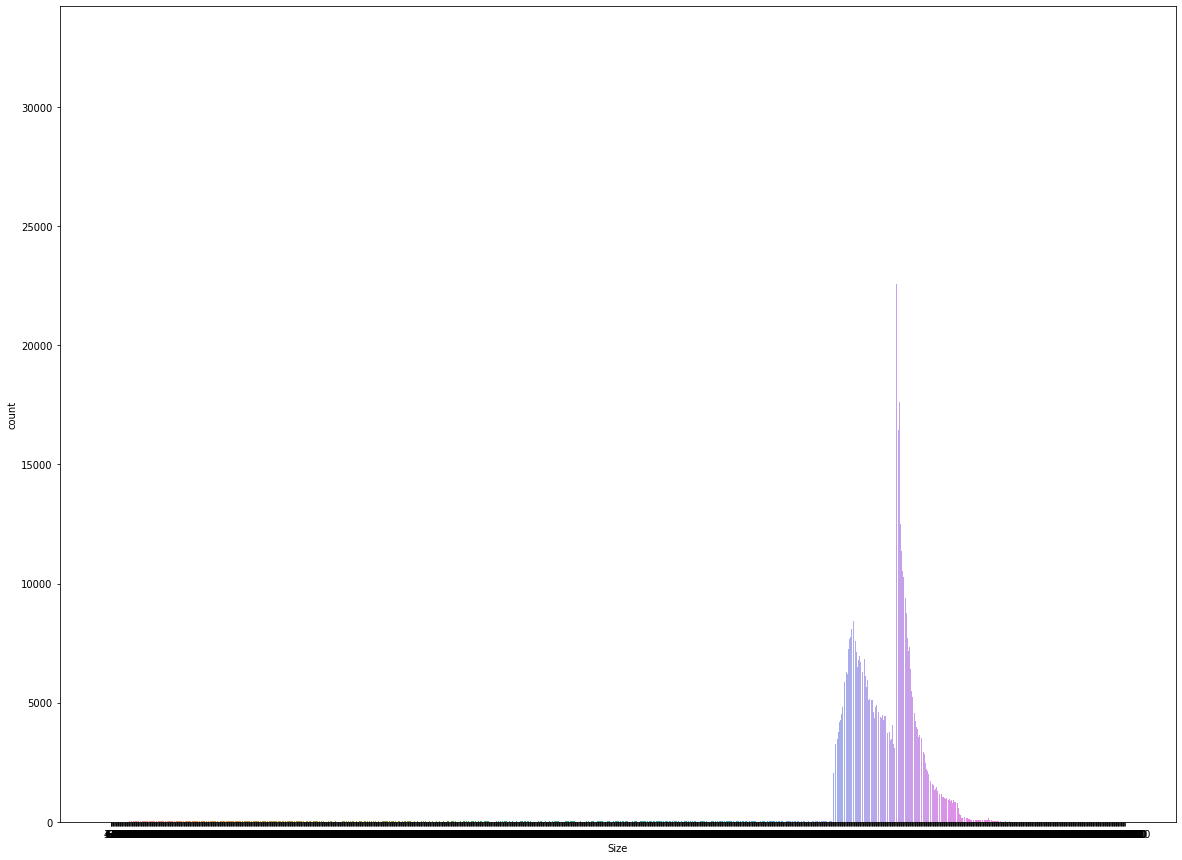

In [224]:
plt.figure(figsize=(20,15))
sns.countplot(train_data['Size'])
plt.plot()

[]

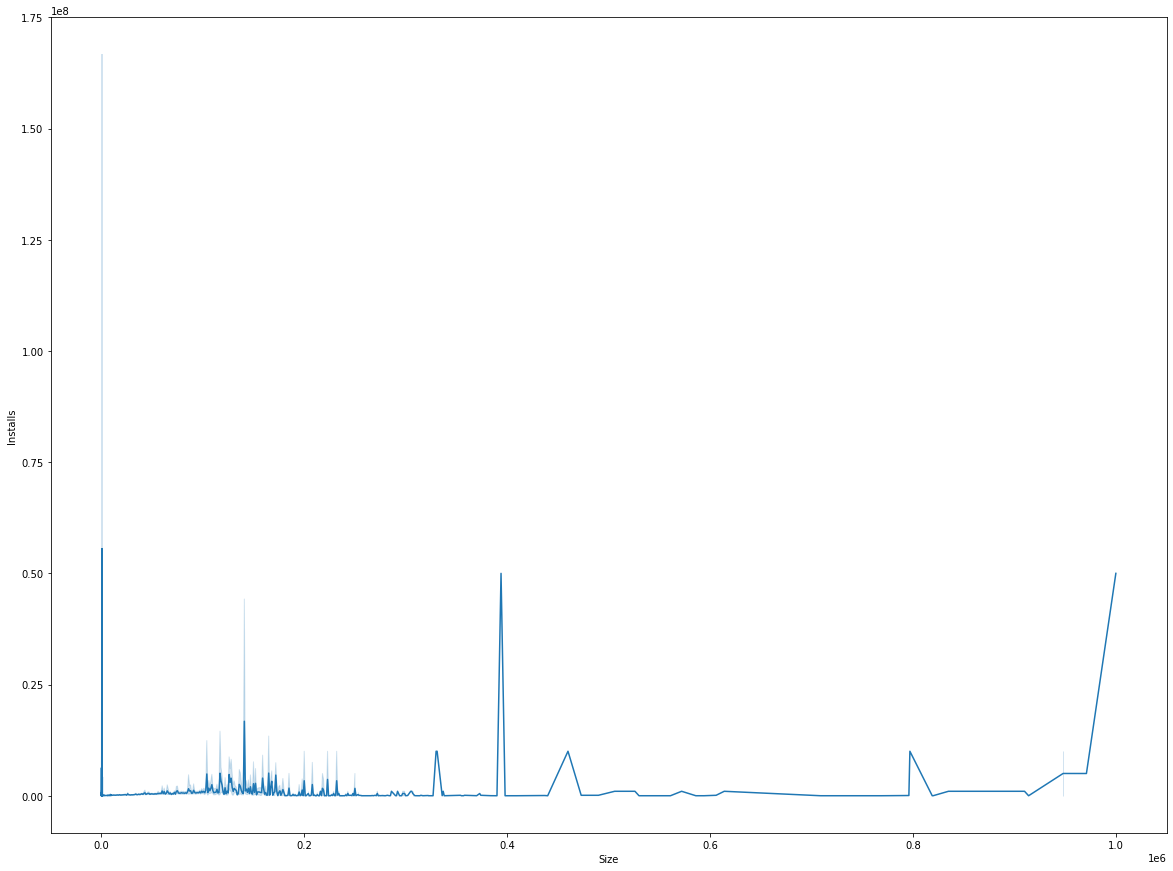

In [225]:
plt.figure(figsize=(20,15))
sns.lineplot(train_data['Size'],train_data['Installs'])
plt.plot()

In [226]:
# Content
train_data['Content Rating'].value_counts()

Everyone           823265
Teen                84662
Mature 17+          27088
Everyone 10+        15299
Unrated                56
Adults only 18+        45
Name: Content Rating, dtype: int64

[]

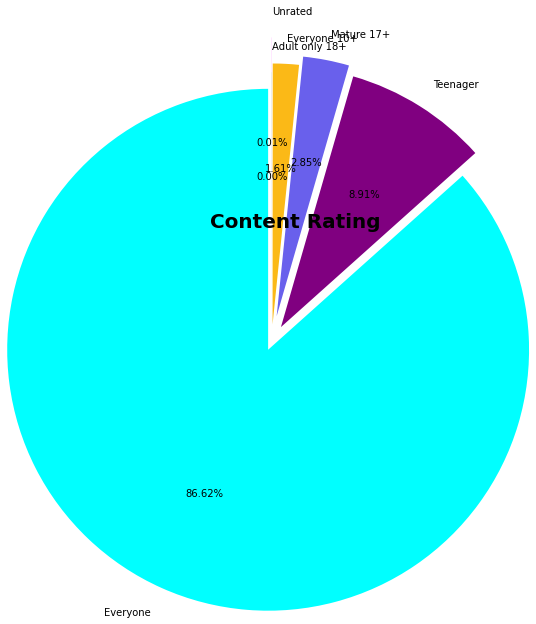

In [227]:
# Content Pie Chart
plt.pie(train_data['Content Rating'].value_counts(),explode=[0.1,0.2,0.3,0.2,0.5,0.1],autopct='%0.2f%%',
        labels=['Everyone','Teenager','Mature 17+','Everyone 10+','Unrated','Adult only 18+'],startangle=90,radius=3,
       colors=['#00ffff','#800080','#6960ec','#fbb917','#ff00ff','#00ff00'])
plt.title('Content Rating',fontdict={'size':20,'weight':'bold'},loc='right')
plt.plot()

[]

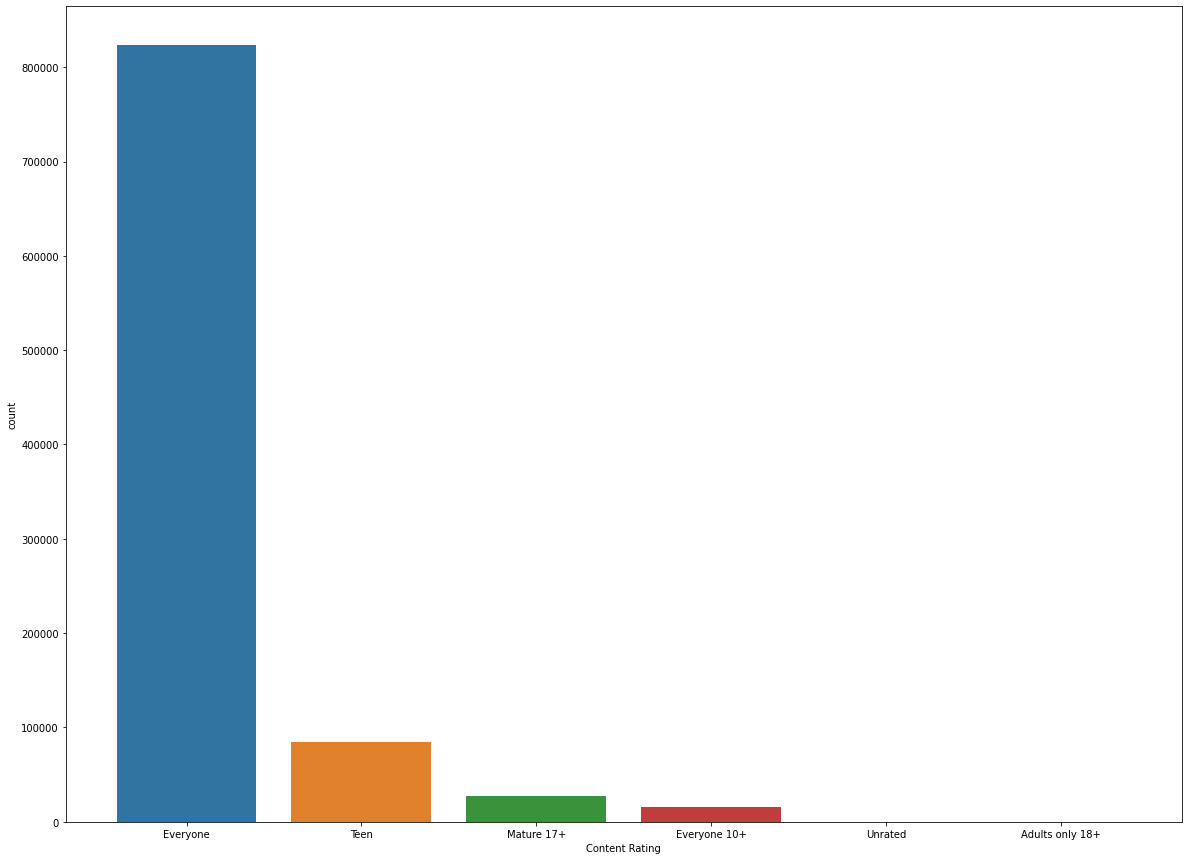

In [228]:
# Content Bar Chart
plt.figure(figsize=(20,15))
sns.countplot(train_data['Content Rating'])
plt.plot()

In [229]:
# Which is the lowest version of Android required
def min_android(data):
    p=data.split()
    if data=='Varies with device':
        return 4.0
    else:
        return float(p[0][:3])
train_data['Minimum Android']=train_data['Minimum Android'].apply(min_android)

[]

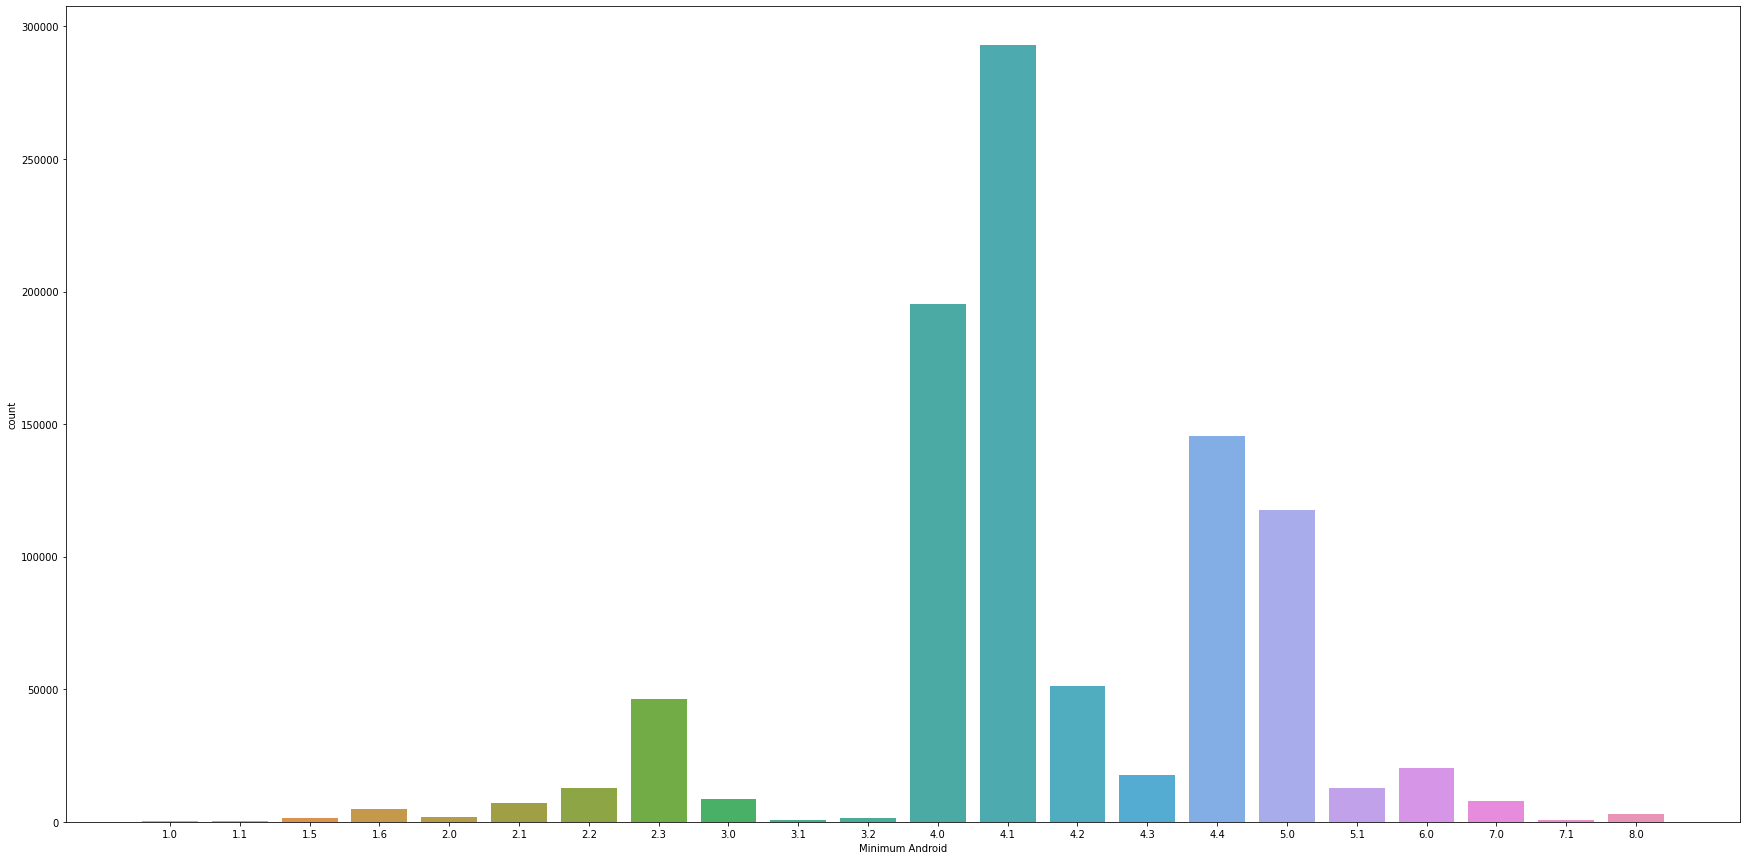

In [230]:
plt.figure(figsize=(30,15))
sns.countplot(train_data['Minimum Android'])
plt.plot()

In [231]:
# Categories
train_data['Category'].value_counts()

Education                  97993
Music & Audio              88917
Entertainment              69769
Books & Reference          67033
Personalization            62499
Tools                      58625
Lifestyle                  46433
Business                   35870
Health & Fitness           26767
Productivity               25787
Photography                24674
Travel & Local             22141
Puzzle                     21230
Finance                    21108
Food & Drink               20650
Sports                     18722
News & Magazines           18270
Casual                     17416
Shopping                   17349
Communication              15638
Arcade                     15056
Social                     14489
Simulation                 13112
Action                     10722
Medical                    10669
Art & Design               10495
Educational                 9616
Maps & Navigation           8861
Adventure                   8633
Video Players & Editors     7707
Auto & Veh

[]

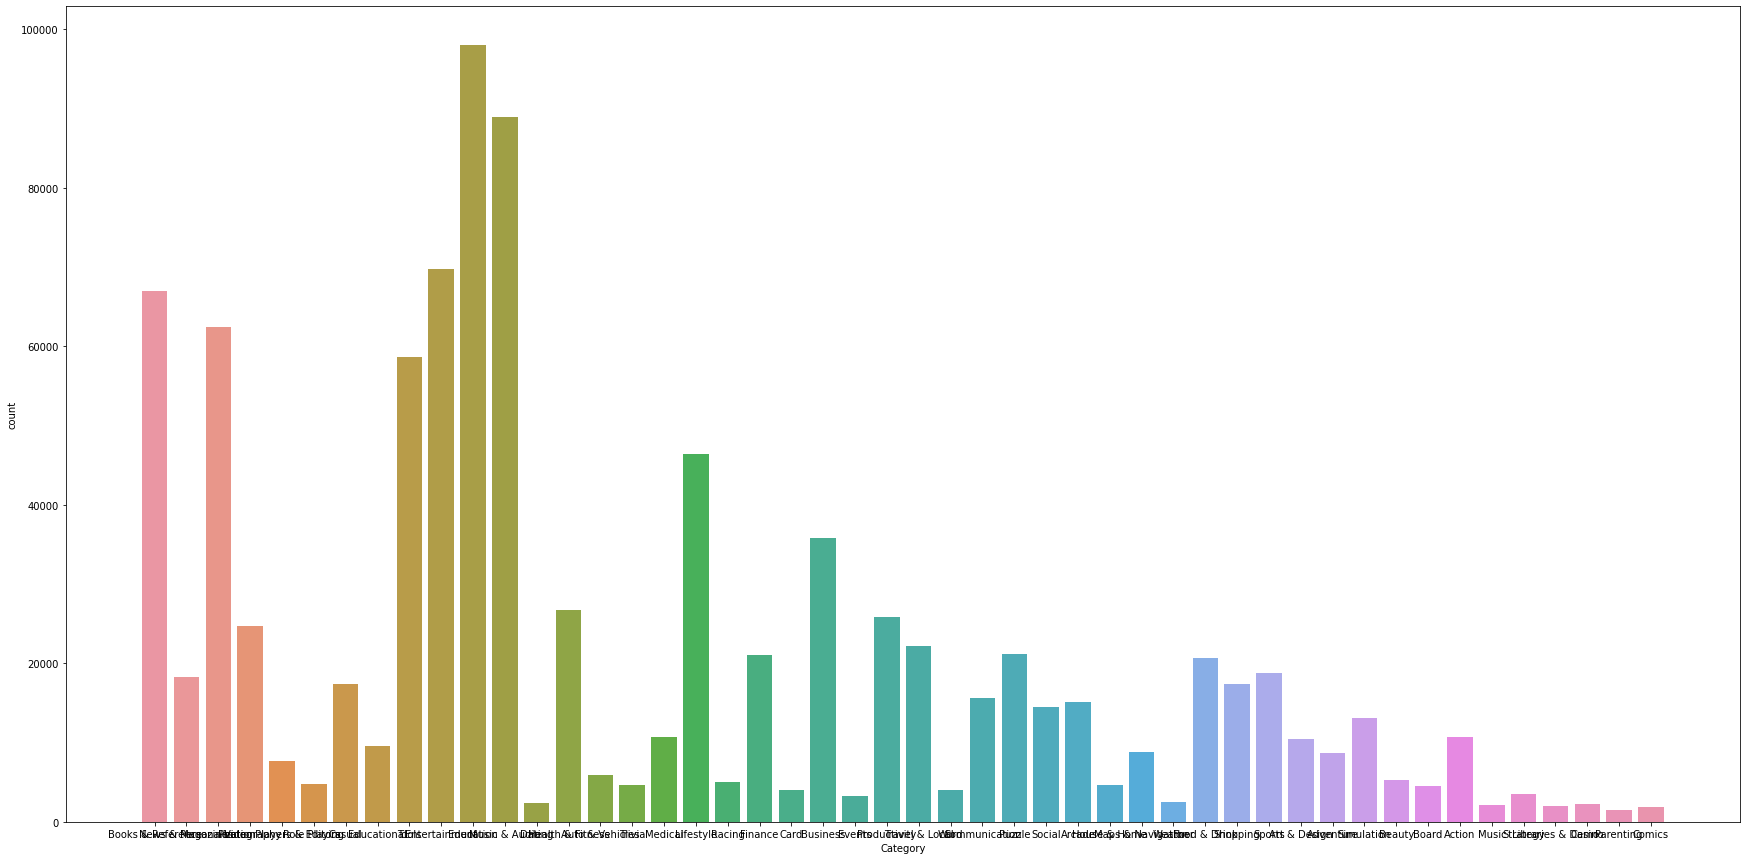

In [232]:
# Categorial Bar Chart
plt.figure(figsize=(30,15))
sns.countplot(train_data['Category'])
plt.plot()

In [233]:
# Imagine that we're converting the $USD to Indian Rupees
cc=CurrencyConverter()


def currency_to_INR(data):
    if data not in cc.currencies:
        data=1
    else:
        data=cc.convert(1,data,'INR')
    return data

In [234]:
train_data['Currency']=train_data['Currency'].apply(currency_to_INR)

In [235]:
train_data.Price=train_data.Price*train_data.Currency
train_data.Price.value_counts()

0.000000       910776
75.031673       11986
150.821241       5008
112.926457       3753
226.610810       3392
                ...  
1454.401820         1
507.032213          1
510.821692          1
268.295073          1
448.674246          1
Name: Price, Length: 652, dtype: int64

In [236]:
# Boolean Categories
bln=[]
for col in train_data.columns:
    if train_data[col].dtype=='bool':
        bln.append(col)
bln

['Free', 'Ad Supported', 'In App Purchases', 'Editors Choice']

In [237]:
# Free Apps?
train_data.Free.value_counts()

True     910641
False     39774
Name: Free, dtype: int64

[]

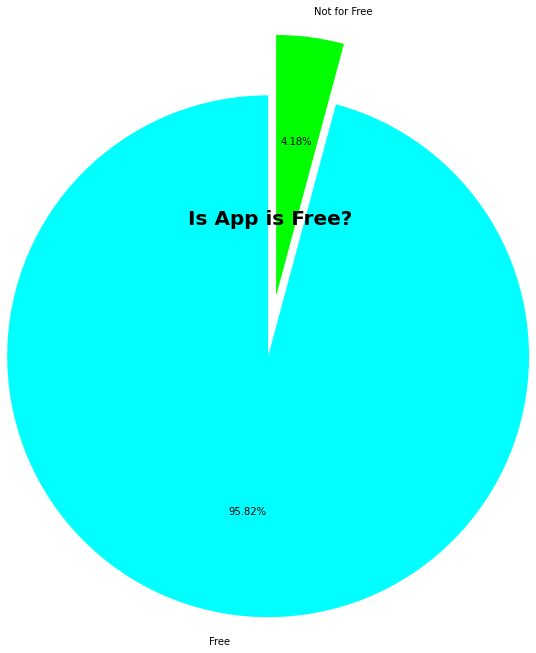

In [238]:
# Pie Chart Percentage of Free Apps (they get you with the buy options :P)
plt.pie(train_data.Free.value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#00ffff','#00ff00'],labels=['Free','Not for Free'],
        startangle=90)
plt.title('Is App is Free?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [239]:
train_data.Free=pd.Categorical(train_data.Free,ordered=True,categories=[False,True]).codes

[]

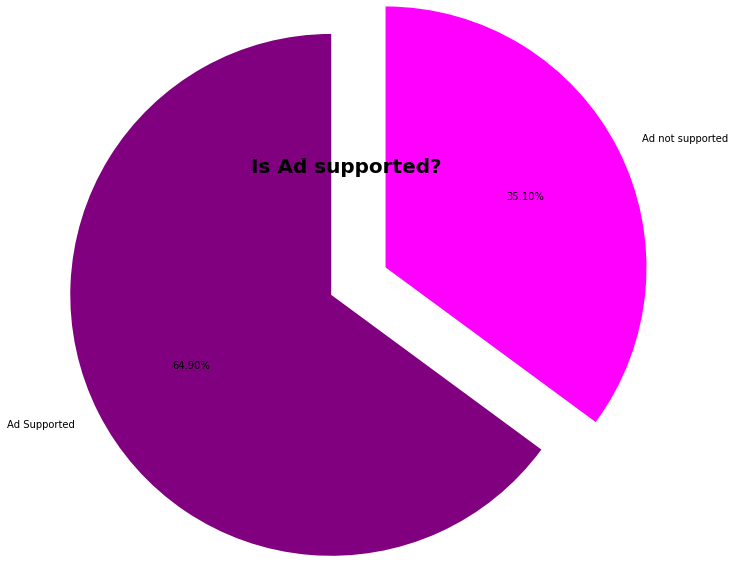

In [240]:
# Percentage of Apps with Ad support, you would really think there would be more looking at the 'Free' Pie Chart
plt.pie(train_data['Ad Supported'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#800080','#ff00ff'],labels=['Ad Supported','Ad not supported'],
        startangle=90)
plt.title('Is Ad supported?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [241]:
train_data['Ad Supported']=pd.Categorical(train_data['Ad Supported'],ordered=True,categories=[False,True]).codes

In [242]:
# Here we go!
train_data['In App Purchases'].value_counts()

False    848362
True     102053
Name: In App Purchases, dtype: int64

[]

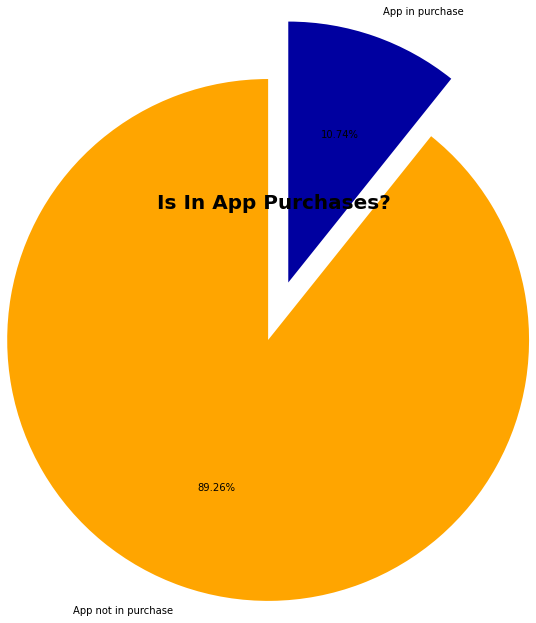

In [243]:
# Apps that have in app purchases, I was totally wrong!  Only 10.74% have in app purchases
plt.pie(train_data['In App Purchases'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['#ffa500','#0000a0'],labels=['App not in purchase','App in purchase'],
        startangle=90)
plt.title('Is In App Purchases?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [244]:
train_data['In App Purchases']=pd.Categorical(train_data['In App Purchases'],ordered=True,categories=[False,True]).codes

[]

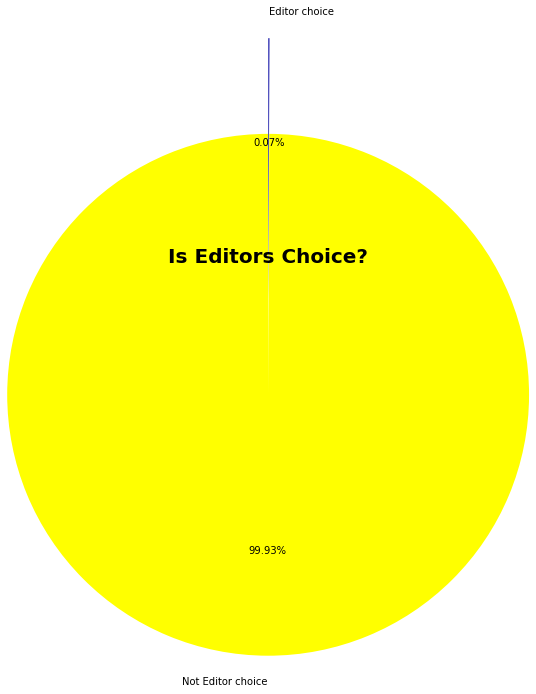

In [245]:
plt.pie(train_data['Editors Choice'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.9],colors=['#ffff00','#0000a0'],labels=['Not Editor choice','Editor choice'],
        startangle=90)
plt.title('Is Editors Choice?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [246]:
train_data['Editors Choice']=pd.Categorical(train_data['Editors Choice'],ordered=True,categories=[False,True]).codes

In [247]:
released_date_rating=pd.concat([train_data['Installs'],train_data['Released']],axis=1)

In [248]:
updated_date_rating=pd.concat([train_data['Rating'],train_data['Last Updated']],axis=1)

[]

<Figure size 1080x720 with 0 Axes>

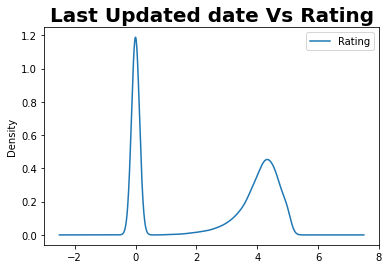

In [249]:
# Last Update vs. Rating
plt.figure(figsize=(15,10))
updated_date_rating.plot(kind='kde')
plt.title('Last Updated date Vs Rating',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [250]:
updated_date_rating=pd.concat([train_data['Rating'],train_data['Last Updated']],axis=1)

In [251]:
train_data.drop(['Released','Last Updated','Currency'],inplace=True,axis=1)

In [252]:
train_data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
1075265,GospelDoctrine.com Mobile,com.ryanconstantine.gdapp,Books & Reference,4.6,31.0,1000,1000.0,2435,1,0.0,1000.0,4.0,Constantine Apps,https://gospeldoctrine.com,mobileapp@gospeldoctrine.com,Everyone,http://www.123muslim.com/islamic-mobile-softwa...,0,0,0
740060,Surah Fatiha,com.islam.surahfatiha,Books & Reference,4.5,41.0,10000,10000.0,15424,1,0.0,3500.0,4.0,123Muslim,http://www.123muslim.com,farhanisfarhan@gmail.com,Everyone,http://www.123muslim.com/islamic-mobile-softwa...,1,1,0
831452,قصص جحا,qisas.joha,News & Magazines,3.9,8.0,1000,1000.0,2853,1,0.0,1900.0,2.1,Hanaeapps,https://lucasappco.com,eljemlisalma@gmail.com,Everyone,http://hanaeapps.blogspot.com/2018/10/privacy-...,1,0,0
118658,Minimal Maps - Themed Map Wallpapers,com.lucasappco.minimalmaps,Personalization,4.8,67.0,1000,1000.0,3406,1,0.0,1000.0,4.1,LucasAppCo,https://lucasappco.com,mail@lucasappco.com,Everyone,https://voolenstudios.com/privacypolicy.html,0,1,0
466592,Women Suit Photo Editor - Stylish Dresses,com.voolenstudios.Womendress.photo.editor,Photography,0.0,0.0,1000,1000.0,4535,1,0.0,10000.0,4.1,Voolen Studios Pvt Ltd,http://www.voolenstudios.com/,info@voolenstudios.com,Everyone,https://voolenstudios.com/privacypolicy.html,1,0,0


[]

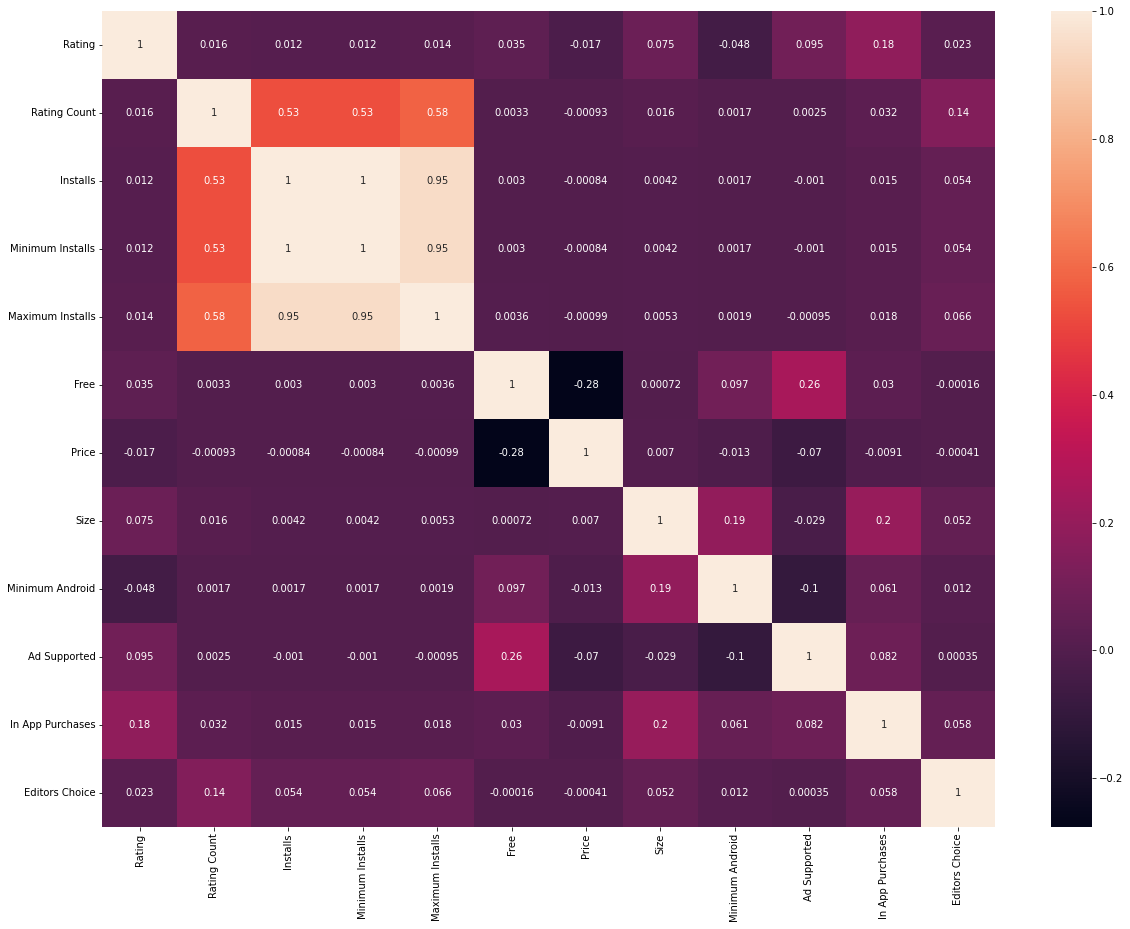

In [253]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.plot()

In [266]:
test_data.fillna(method='bfill',inplace=True)

In [267]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167721 entries, 241581 to 718664
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           167721 non-null  object 
 1   App Id             167721 non-null  object 
 2   Category           167721 non-null  object 
 3   Rating             167721 non-null  float64
 4   Rating Count       167721 non-null  float64
 5   Installs           167721 non-null  object 
 6   Minimum Installs   167721 non-null  float64
 7   Maximum Installs   167721 non-null  int64  
 8   Free               167721 non-null  bool   
 9   Price              167721 non-null  float64
 10  Currency           167721 non-null  object 
 11  Size               167721 non-null  object 
 12  Minimum Android    167721 non-null  object 
 13  Developer Id       167721 non-null  object 
 14  Developer Website  167721 non-null  object 
 15  Developer Email    167721 non-null  object 
 1